# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# EDA

In [2]:
# Load the dataset
df = sns.load_dataset("tips")
df.tail()


,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [3]:
# Data inspection
print("Dataset Info:")
print(df.info())

print("\nDataset Summary:")
print(df.describe())

print("\nChecking Null Values")
df.isna().sum()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None

Dataset Summary:
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

Checking Null Values


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [4]:
# summary statisitcs of categorical column
df.describe(include='category')

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


# Visulaization

Text(0.5, 1.0, 'Total bill vs Tip')

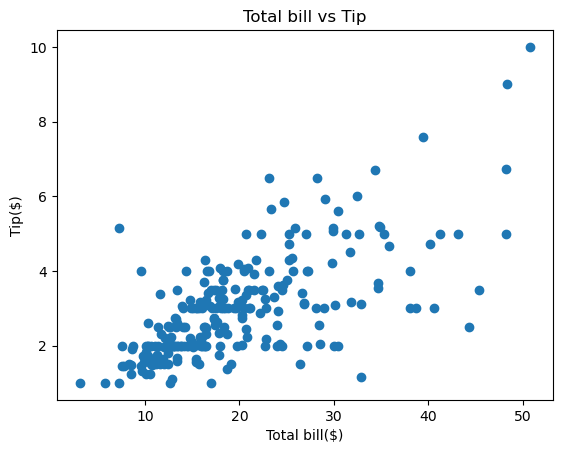

In [5]:
# Scatterplot
plt.scatter(df['total_bill'],df['tip'])
plt.xlabel("Total bill($)")
plt.ylabel("Tip($)")
plt.title("Total bill vs Tip")

<function matplotlib.pyplot.show(close=None, block=None)>

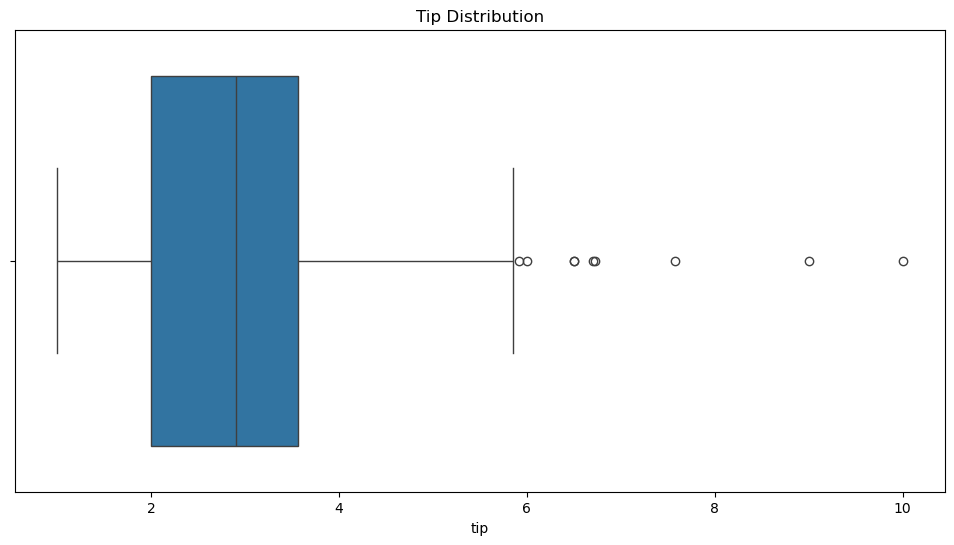

In [8]:
# BoxPlot
plt.figure(figsize=(12,6))
sns.boxplot(x =df['tip'])
plt.title("Tip Distribution")
plt.show

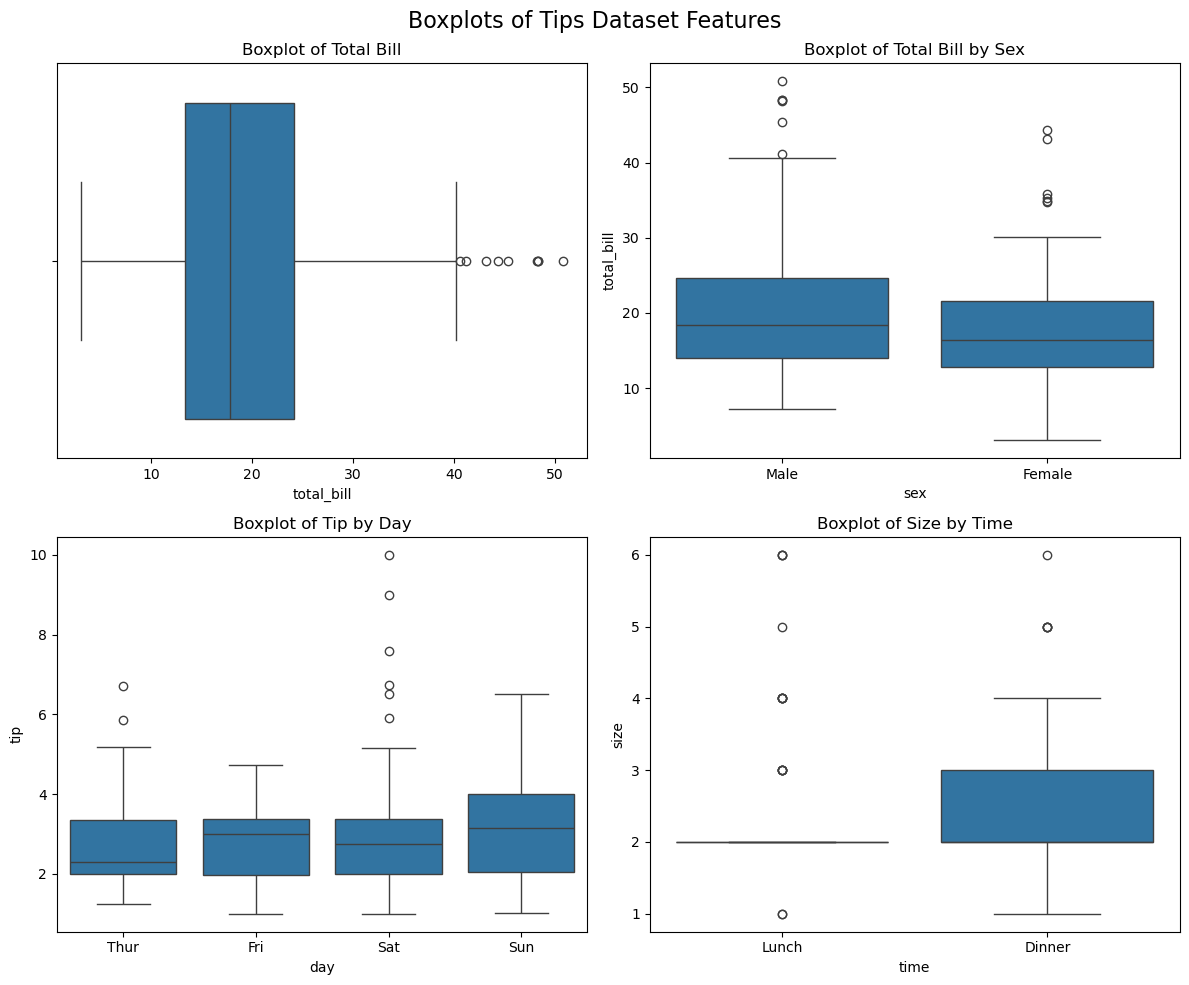

In [9]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  
fig.suptitle('Boxplots of Tips Dataset Features', fontsize=16)

# Plot 1: Boxplot of total_bill
sns.boxplot(x=df['total_bill'], ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of Total Bill')

# Plot 2: Boxplot of total_bill grouped by sex
sns.boxplot(x='sex', y='total_bill', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Total Bill by Sex')

# Plot 3: Boxplot of tip grouped by day
sns.boxplot(x='day', y='tip', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of Tip by Day')

# Plot 4: Boxplot of size grouped by time
sns.boxplot(x='time', y='size', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of Size by Time')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Histogram of Total Bill')

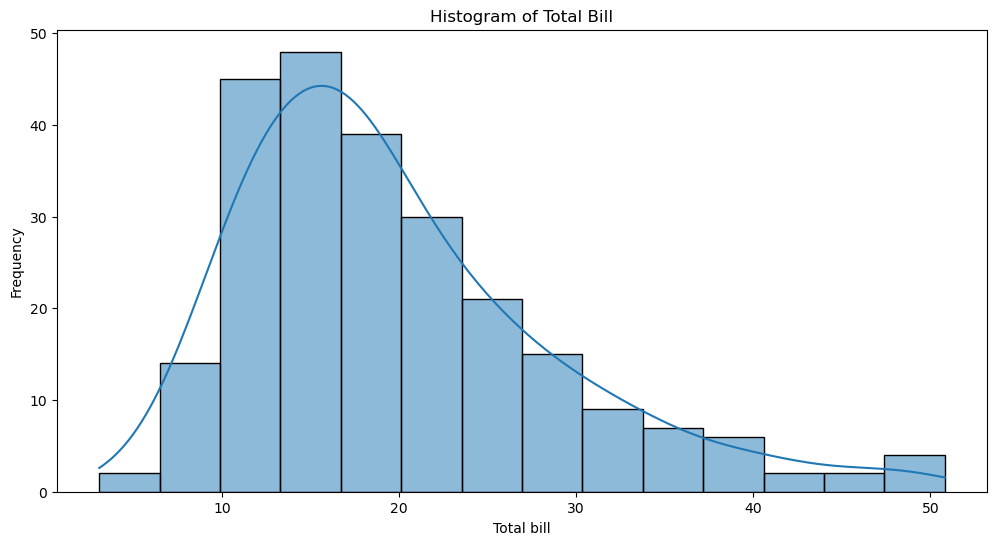

In [10]:
# Create Histogram plot using Seaborn
plt.figure(figsize=(12,6))
sns.histplot(data = df, x = 'total_bill',kde=True)
plt.xlabel("Total bill")
plt.ylabel("Frequency")
plt.title("Histogram of Total Bill")

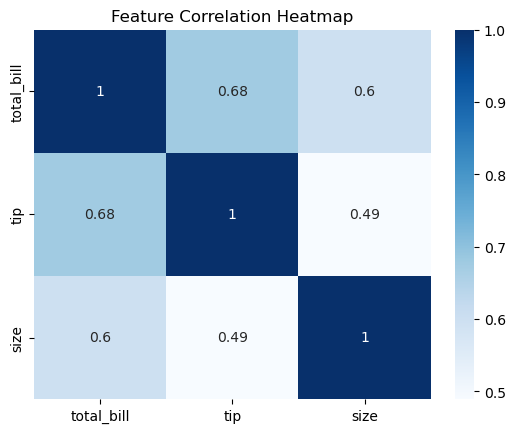

In [11]:
# Compute correlation only for numerical columns
df_num = df.select_dtypes(include=['number'])
sns.heatmap(df_num.corr(), annot=True, cmap='Blues')
plt.title("Feature Correlation Heatmap")
plt.show()

# Data Preparation 

In [12]:
# Handling Outliers for numerical columns
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1                   # Interquartile range
    lower_bound = Q1 - 1.5 * IQR    # Lower bound
    upper_bound = Q3 + 1.5 * IQR    # Upper bound
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers(df, 'total_bill')
df = remove_outliers(df, 'tip')

In [13]:
# One-hot encoding on categorical columns
tips = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'],drop_first=True)
tips.head()

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,True,True,False,False,True,True
1,10.34,1.66,3,False,True,False,False,True,True
2,21.01,3.50,3,False,True,False,False,True,True
3,23.68,3.31,2,False,True,False,False,True,True
4,24.59,3.61,4,True,True,False,False,True,True


# Model Building

In [14]:
# Splitting Data
X = tips.drop(columns=['tip'])
y = tips['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear regression

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
# Evaluation Metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Mean Squared Error (MSE): {mse_lr}')
print(f'Root Mean Squared Error (RMSE): {rmse_lr}')
print(f'Mean Absolute Error (MAE): {mae_lr}')
print(f'R² Score : {r2_lr}')

Mean Squared Error LinearRegression (MSE): 0.7584469450576254
Root Mean Squared Error LinearRegression (RMSE): 0.7584469450576254
Mean Absolute Error LinearRegression(MAE): 0.7233731608691805
R² Score LinearRegression: 0.2965077670154034


Ridge regression

In [21]:
rr = Ridge(alpha=1.0)
rr.fit(X_train, y_train)
y_pred_rr = rr.predict(X_test)

In [ ]:
# Evaluation Metrics
mse_rr = mean_squared_error(y_test, y_pred_rr)
rmse_rr = mean_squared_error(y_test, y_pred_rr)
mae_rr = mean_absolute_error(y_test, y_pred_rr)
r2_rr = r2_score(y_test, y_pred_rr)

print(f'Mean Squared Error (MSE): {mse_rr}')
print(f'Root Mean Squared Error (RMSE): {rmse_rr}')
print(f'Mean Absolute Error (MAE): {mae_rr}')
print(f'R² Score : {r2_rr}')

Mean Squared Error LinearRegression (MSE): 0.7565505493143317
Root Mean Squared Error LinearRegression (RMSE): 0.7565505493143317
Mean Absolute Error LinearRegression(MAE): 0.723073986721655
R² Score LinearRegression: 0.2982667558079164


Lasso regression

In [23]:
ls = Lasso(alpha=0.1)
ls.fit(X_train, y_train)
y_pred_ls = ls.predict(X_test)

In [ ]:
# Evaluation Metrics
mse_ls = mean_squared_error(y_test, y_pred_ls)
rmse_ls = mean_squared_error(y_test, y_pred_ls)
mae_ls = mean_absolute_error(y_test, y_pred_ls)
r2_ls = r2_score(y_test, y_pred_ls)

print(f'Mean Squared Error (MSE): {mse_ls}')
print(f'Root Mean Squared Error  (RMSE): {rmse_ls}')
print(f'Mean Absolute Error (MAE): {mae_ls}')
print(f'R² Score : {r2_ls}')

Mean Squared Error LinearRegression (MSE): 0.73787398401435
Root Mean Squared Error LinearRegression (RMSE): 0.73787398401435
Mean Absolute Error LinearRegression(MAE): 0.7235642356483014
R² Score LinearRegression: 0.3155900751422286


# Hyperparamater Tuning

Ridge regession

In [25]:
# Hyperparameter Tuning using Grid Search for Ridge Regression
ridge_params = {'alpha': [0.1, 1.0, 10.0]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1.0, 10.0]})

In [40]:
# Best Ridge model after tuning
best_ridge_model = ridge_grid.best_estimator_
print(best_ridge_model)
y_pred_ridge = best_ridge_model.predict(X_test)

Ridge(alpha=10.0)


In [31]:
# Evaluation Metrics on Validation Set for Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge Regression - Validation Mean Squared Error (MSE): {mse_ridge}')
print(f'Ridge Regression - Validation Root Mean Squared Error (RMSE): {rmse_ridge}')
print(f'Ridge Regression - Validation Mean Absolute Error (MAE): {mae_ridge}')
print(f'Ridge Regression - Validation R² Score: {r2_ridge}')

Ridge Regression - Validation Mean Squared Error (MSE): 0.7500144951311497
Ridge Regression - Validation Root Mean Squared Error (RMSE): 0.7500144951311497
Ridge Regression - Validation Mean Absolute Error (MAE): 0.7232001121799856
Ridge Regression - Validation R² Score: 0.3043292277872659


Lasso regression

In [39]:
# Hyperparameter Tuning using Grid Search for Lasso Regression
lasso_params = {'alpha': [0.01, 0.1, 1.0]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5)
lasso_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [0.01, 0.1, 1.0]})

In [41]:
# Best Lasso model after tuning
best_lasso_model = lasso_grid.best_estimator_
print(best_lasso_model)
y_pred_lasso = best_lasso_model.predict(X_test)

Lasso(alpha=0.01)


In [43]:
# Evaluation Metrics on Validation Set for Lasso Regression
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Lasso Regression - Validation Mean Squared Error (MSE): {mse_lasso}')
print(f'Lasso Regression - Validation Root Mean Squared Error (RMSE): {rmse_lasso}')
print(f'Lasso Regression - Validation Mean Absolute Error (MAE): {mae_lasso}')
print(f'Lasso Regression - Validation R² Score: {r2_lasso}')

Lasso Regression - Validation Mean Squared Error (MSE): 0.748863932067893
Lasso Regression - Validation Root Mean Squared Error (RMSE): 0.748863932067893
Lasso Regression - Validation Mean Absolute Error (MAE): 0.7272860065785991
Lasso Regression - Validation R² Score: 0.30539642462131533


Best Model selection

In [44]:
# Choose the best model based on validation performance
if rmse_ridge < rmse_lasso:
    best_model = best_ridge_model
    print("Best Model: Ridge Regression")
else:
    best_model = best_lasso_model
    print("Best Model: Lasso Regression")

Best Model: Lasso Regression


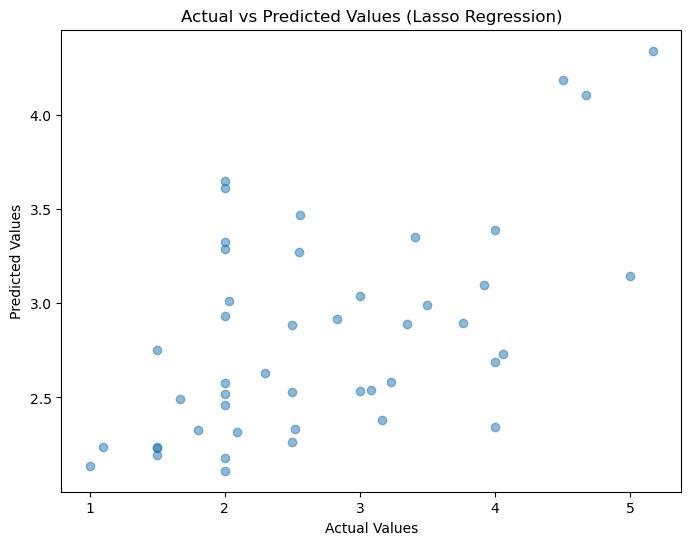

In [50]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.5)  # Scatter plot of actual vs predicted
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Lasso Regression)')
plt.show()

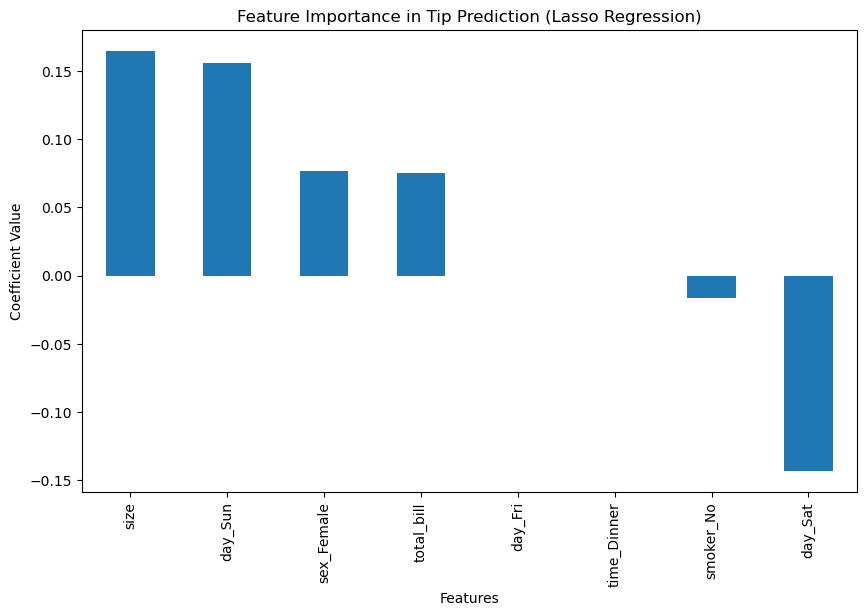

Most important features influencing tip amount (Lasso Regression):
size          0.164519
day_Sun       0.155768
sex_Female    0.076896
total_bill    0.075063
day_Fri       0.000000
dtype: float64


In [ ]:
# Get coefficients from the Lasso model
coefficients = best_lasso_model.coef_  
feature_names = X_train.columns 

# Create a Series for feature importance
feature_importance = pd.Series(coefficients, index=feature_names).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title("Feature Importance in Tip Prediction (Lasso Regression)")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.show()

# Print the most important features
print("Most important features influencing tip amount (Lasso Regression):")
print(feature_importance.head(5))